In [9]:
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ''
#import tensorflow as tf
POINT_TYPE_LABELS = {0: "focus hit", 1: "cell", 2: "unfocus hit", -1: "padding"}
import matplotlib.pyplot as plt
POINT_TYPE_ENCODING = {v: k for k, v in POINT_TYPE_LABELS.items()}
from numpy.lib import recfunctions as rfn

In [10]:
sample_model_data = [
    [0.4,0.6,0.5],
    [0.3,0.2,0.9],
    [0.3,0.2,0.9],
]
sample_truth_data = [
    [0,1,0],
    [1,0,0],
    [0,0,1]
]
sampel_energies = [
    1,
    1,
    1
]
sample_classes = [
    1,
    1,
    1
]
# , sample_weight=np.array([0.3, 0.7])


In [11]:
# hist of each vary in an npz file
npz_file = "/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_7/SavedNpz/deltaR=0.2_maxLen=800_MaxTrackAtributions=26_EScale=1/train/rho/user.mswiatlo.40097513._000014.mltree.root_chunk_11_train.parquet.npz"
npz_data_named = np.load(npz_file)['feats']
npz_data = rfn.structured_to_unstructured(npz_data_named)

In [32]:
npz_data_named[:,:]['category']

array([[ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       ...,
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1]], dtype=int8)

In [23]:
npz_data_named[0,0].dtype.names

('event_number',
 'cell_ID',
 'track_ID',
 'delta_R',
 'truth_cell_focal_fraction_energy',
 'truth_cell_non_focal_fraction_energy',
 'truth_cell_neutral_fraction_energy',
 'truth_cell_total_energy',
 'category',
 'track_num',
 'normalized_x',
 'normalized_y',
 'normalized_z',
 'normalized_distance',
 'cell_sigma',
 'track_chi2_dof',
 'track_chi2_dof_cell_sigma',
 'cell_E',
 'track_pt',
 'track_pt_cell_E')

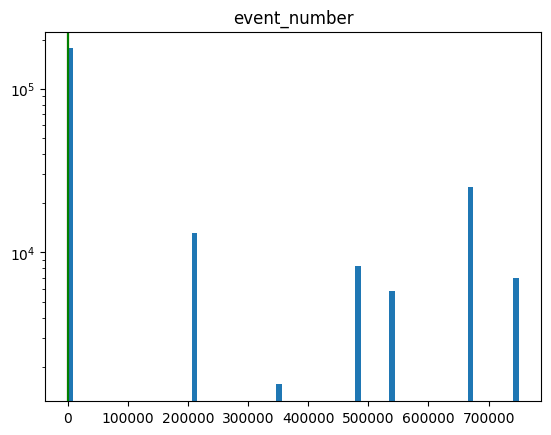

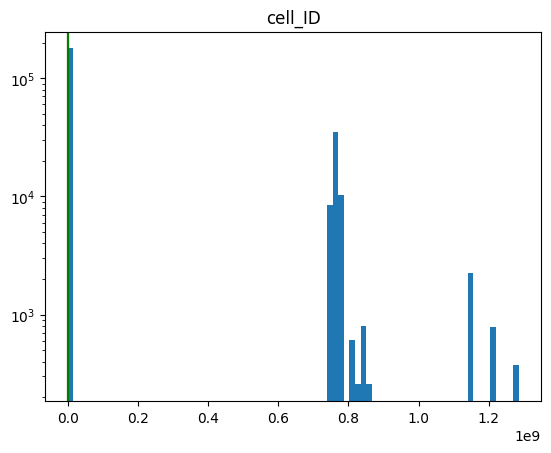

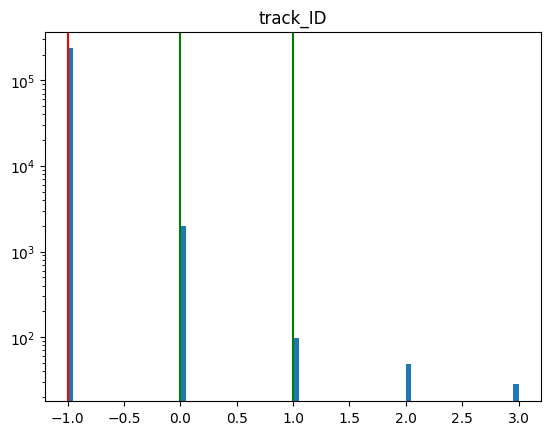

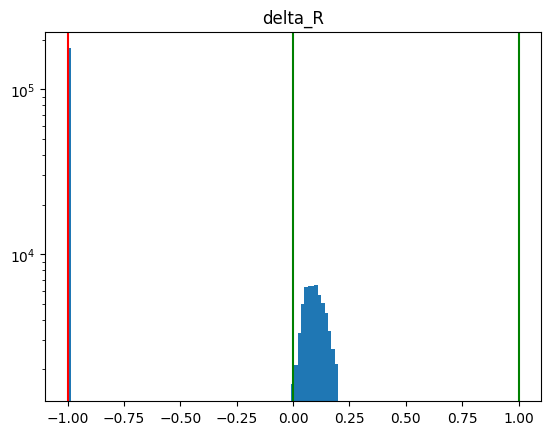

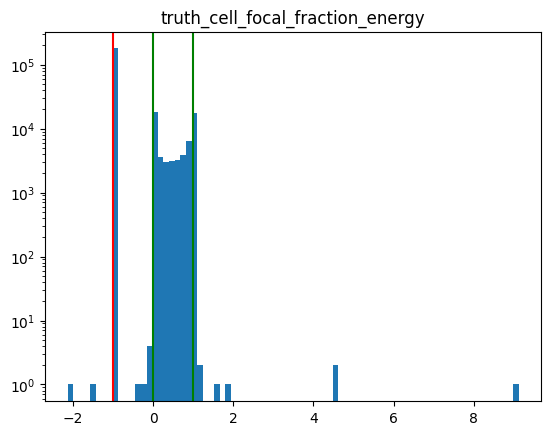

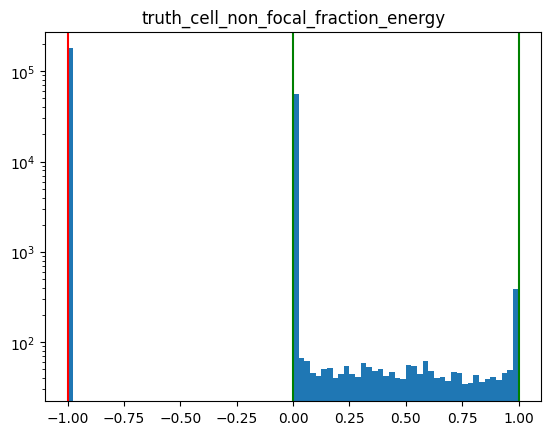

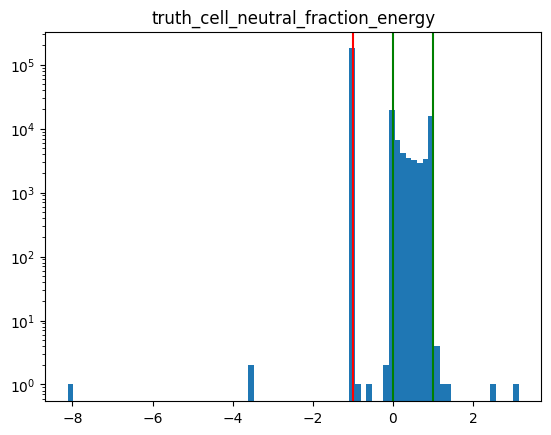

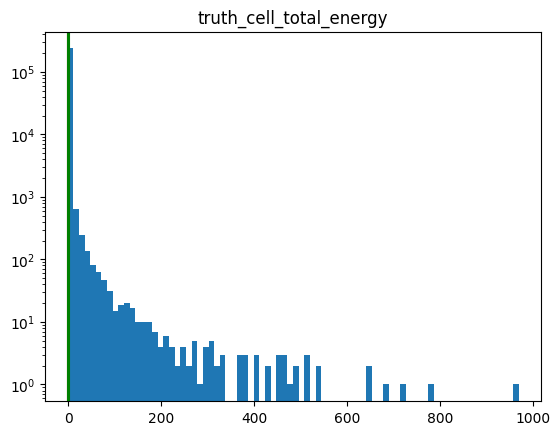

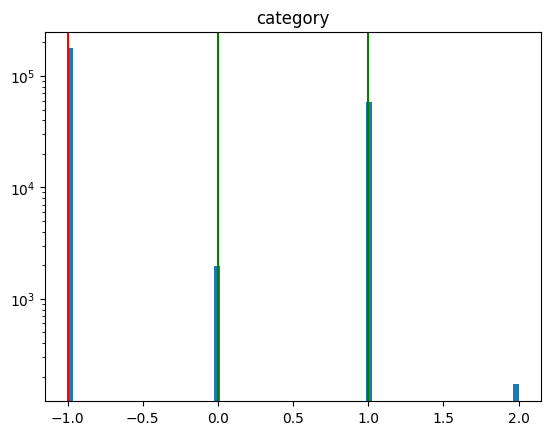

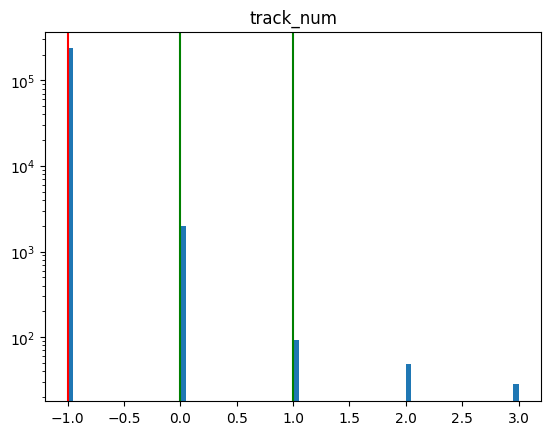

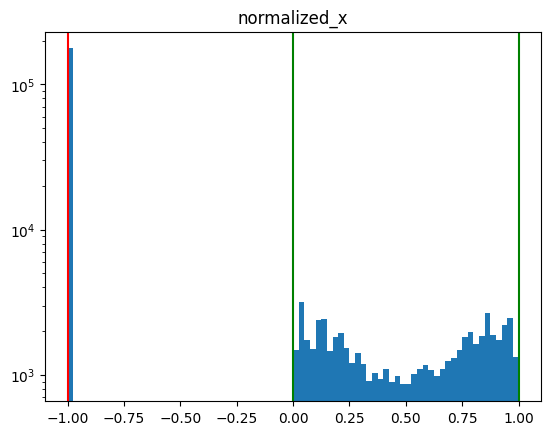

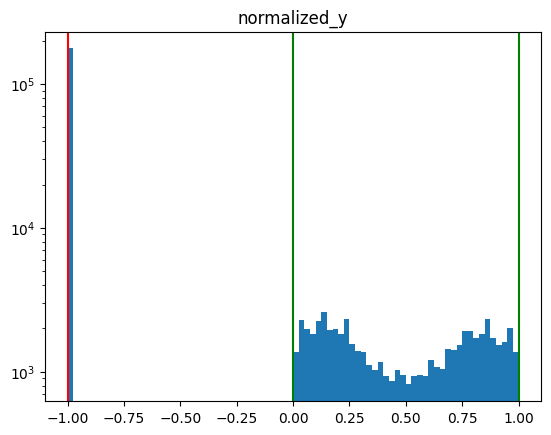

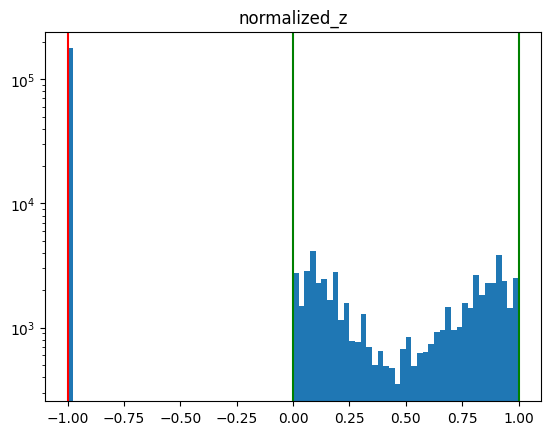

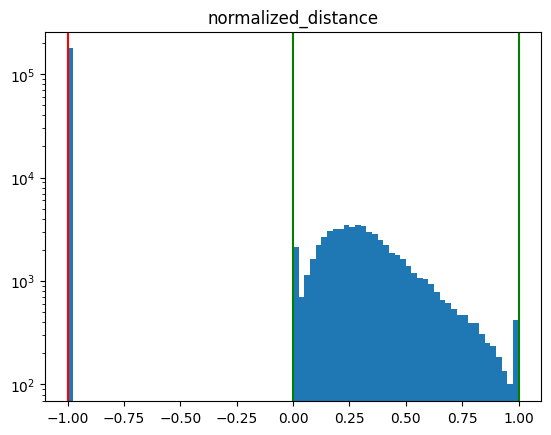

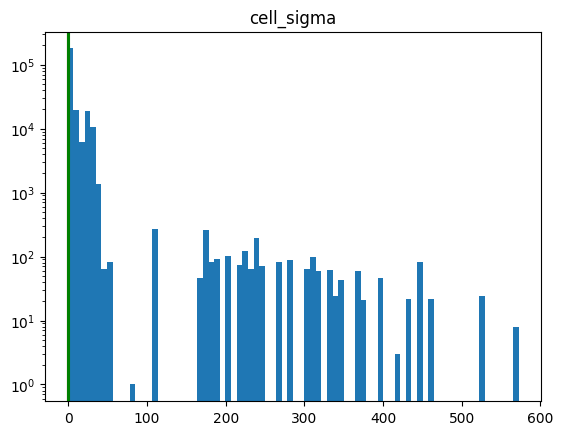

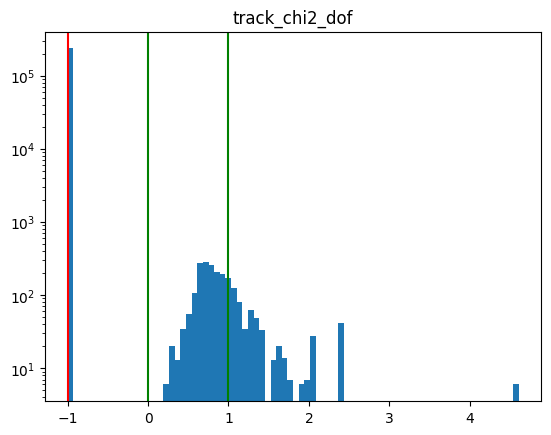

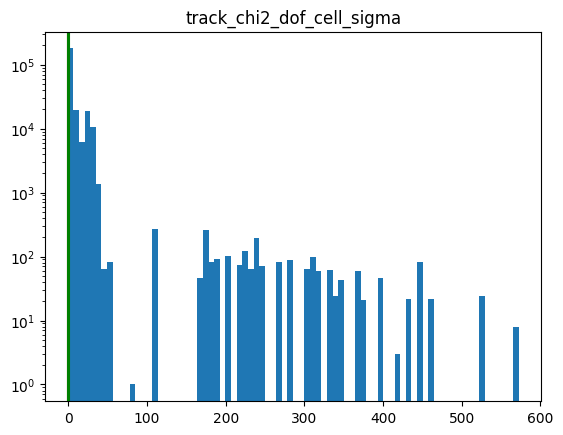

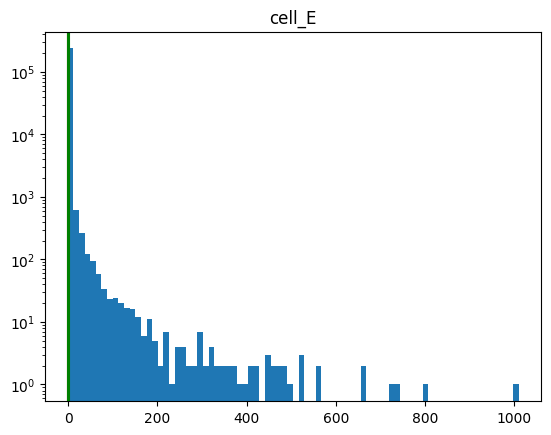

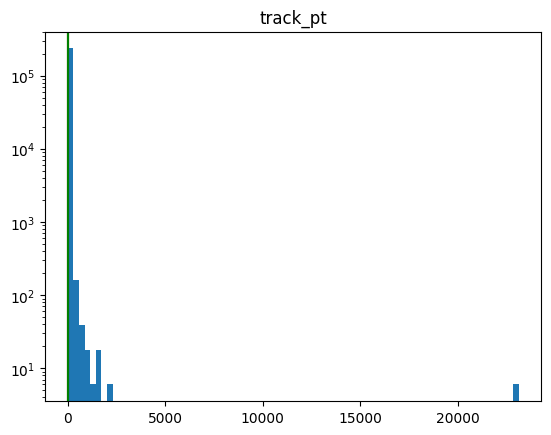

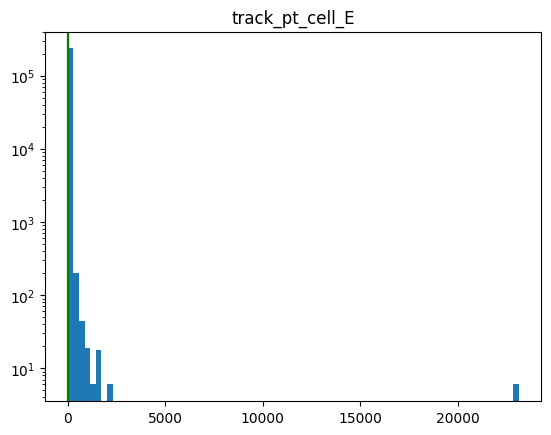

In [37]:
for i in range(npz_data.shape[2]):
    plt.hist(npz_data[:,:,i].flatten(), bins=80)
    plt.title(npz_data_named[0,0].dtype.names[i])
    plt.axvline(-1, label='null', c='red')
    plt.axvline(0, label='min',c='green')
    plt.axvline(1, label='max',c='green')
    plt.yscale('log')
    plt.show()